In [1]:
import pandas as pd

churn_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn_R2.csv')
churn_data_tests = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn_R2_Test.csv')


In [2]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [3]:
churn_data.describe()

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.00000,7011.000000,7011.000000,7011.000000,7011.000000,7011.00000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000
mean,0.504636,0.162316,0.482955,0.298959,32.426615,0.903295,0.422051,1.224076,0.719298,0.77735,0.776351,0.722579,0.816574,0.820996,0.68906,0.592212,1.573242,64.798645,2283.620126,0.265868
std,0.500014,0.368767,0.499745,0.457834,24.542847,0.295577,0.493922,0.778727,0.796531,0.77822,0.778575,0.795621,0.763104,0.761254,0.83317,0.491458,1.067423,30.094030,2266.680399,0.441826
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,35.550000,401.400000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,2.000000,70.350000,1397.300000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000,89.900000,3798.375000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.00000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

sb.set_style('ticks')
sb.set_context('paper', font_scale=1.6)

<AxesSubplot:xlabel='Churn', ylabel='count'>

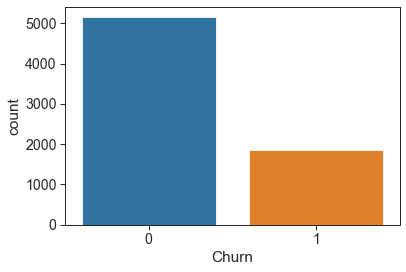

In [5]:
sb.countplot(x='Churn', data=churn_data)

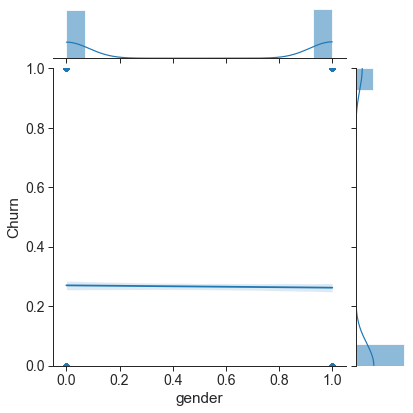

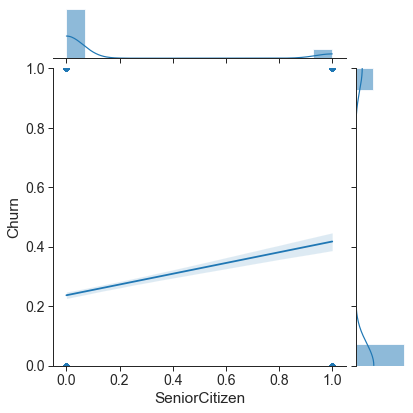

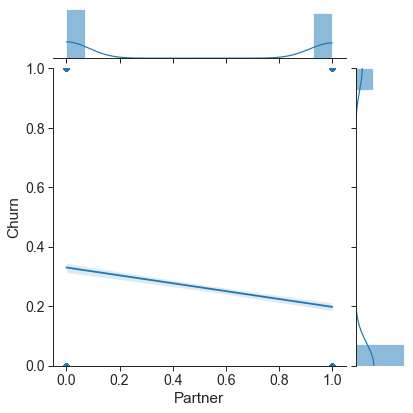

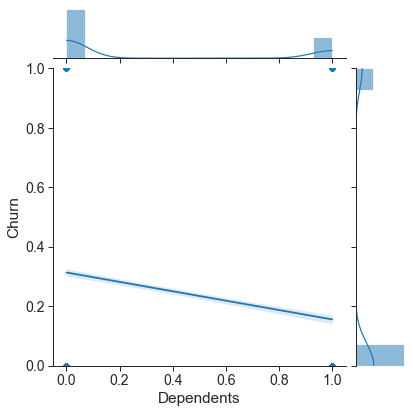

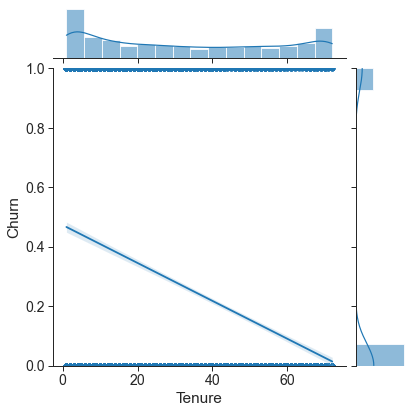

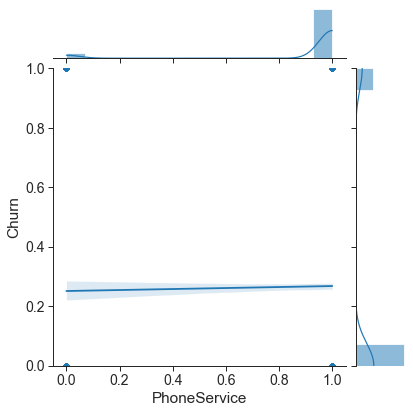

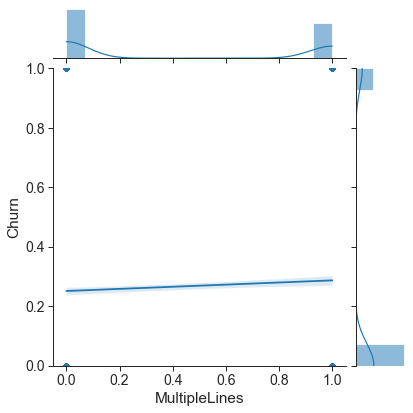

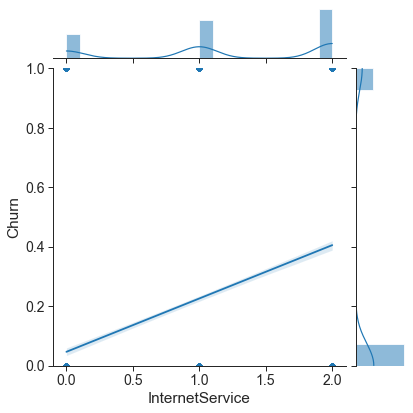

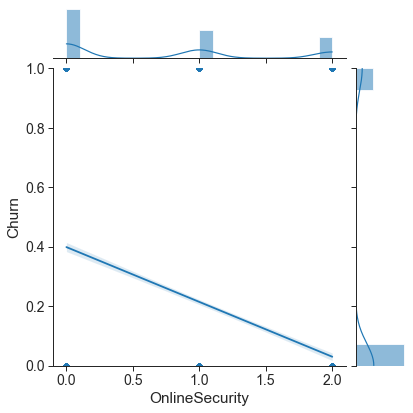

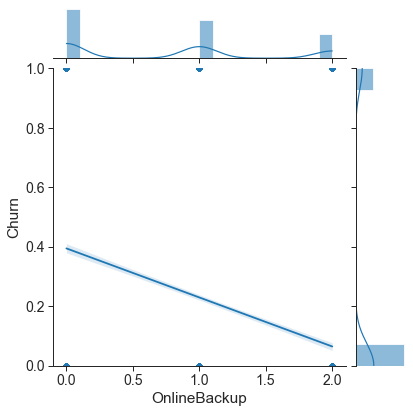

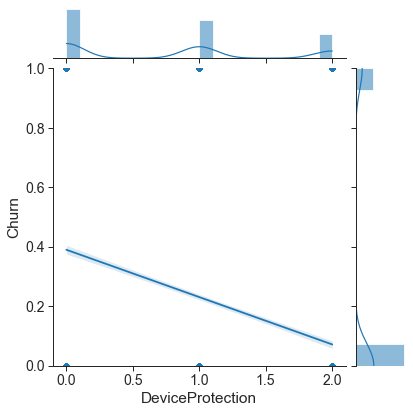

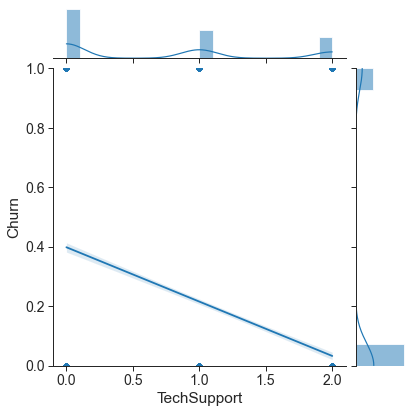

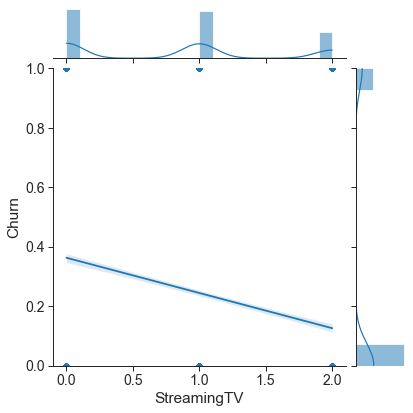

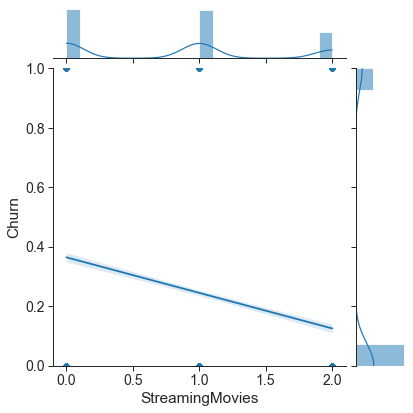

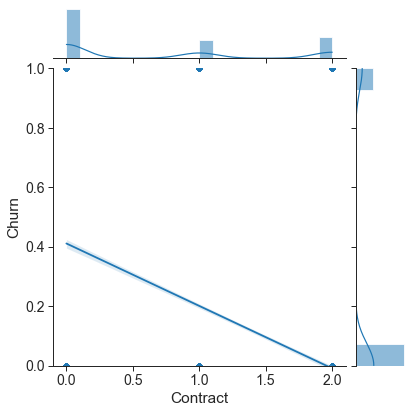

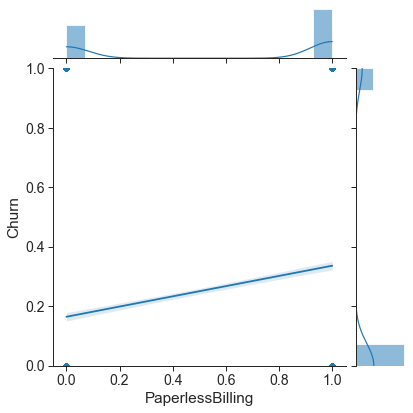

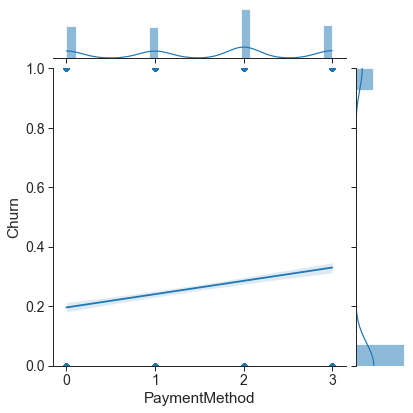

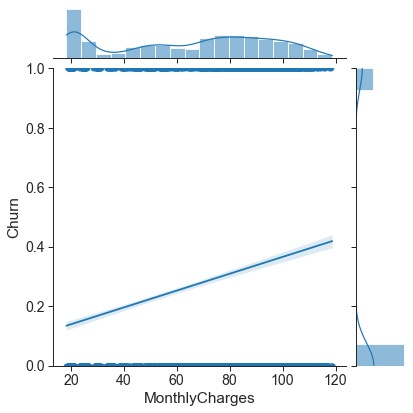

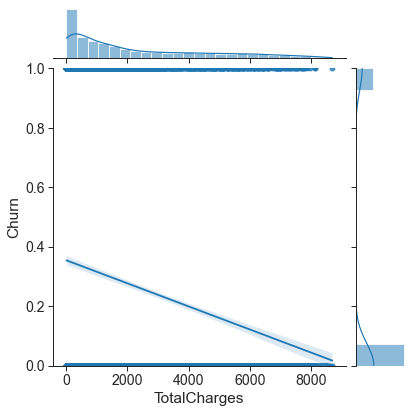

In [6]:
import numpy as np

for column in churn_data.columns[1:np.size(churn_data.columns)-1]:
    sb.jointplot(x=column, y='Churn', data=churn_data, kind='reg')
    plt.ylim(0,1)


In [7]:
churn_mx = churn_data.corr()
churn_mx['Churn']

gender             -0.008808
SeniorCitizen       0.150981
Partner            -0.150037
Dependents         -0.163793
Tenure             -0.354279
PhoneService        0.011206
MultipleLines       0.040069
InternetService     0.316485
OnlineSecurity     -0.332698
OnlineBackup       -0.290827
DeviceProtection   -0.280799
TechSupport        -0.329473
StreamingTV        -0.204822
StreamingMovies    -0.206271
Contract           -0.396594
PaperlessBilling    0.191254
PaymentMethod       0.108129
MonthlyCharges      0.193041
TotalCharges       -0.199691
Churn               1.000000
Name: Churn, dtype: float64

In [8]:
churn_mx_tests = churn_data_tests.corr()
churn_mx_tests['Churn']

gender              0.085280
SeniorCitizen       0.013558
Partner            -0.158114
Dependents          0.091287
Tenure             -0.283188
PhoneService        0.181369
MultipleLines       0.021926
InternetService     0.269782
OnlineSecurity     -0.262461
OnlineBackup       -0.375871
DeviceProtection   -0.375871
TechSupport        -0.335900
StreamingTV        -0.360180
StreamingMovies    -0.522043
Contract           -0.247445
PaperlessBilling    0.312500
PaymentMethod       0.014597
MonthlyCharges      0.123386
TotalCharges       -0.132494
Churn               1.000000
Name: Churn, dtype: float64

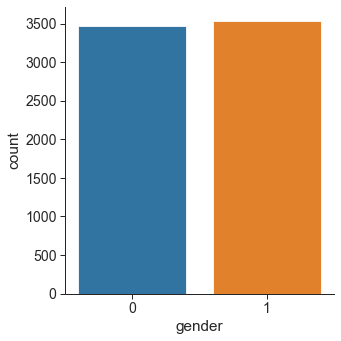

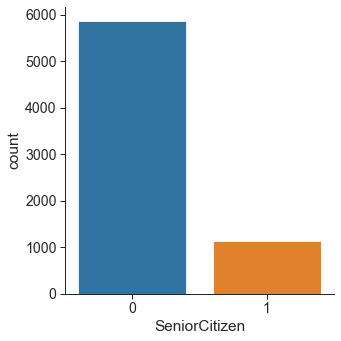

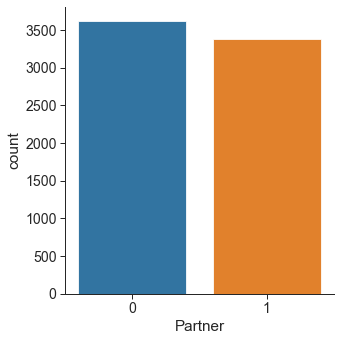

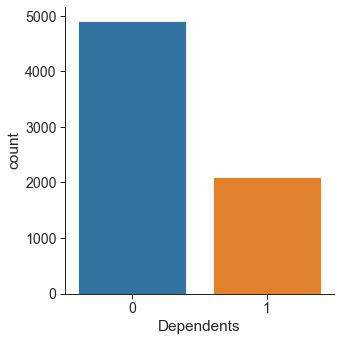

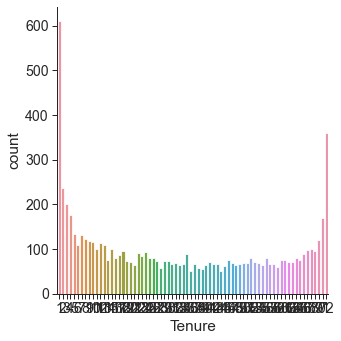

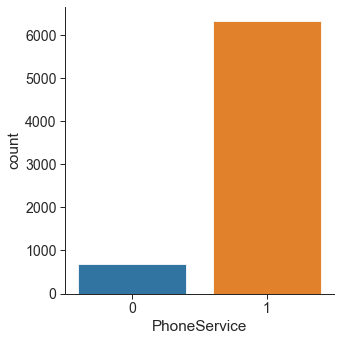

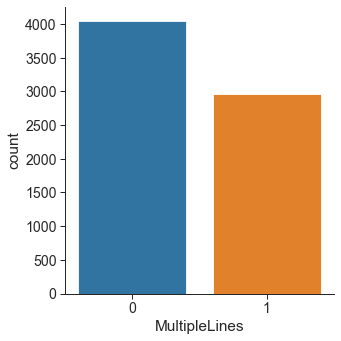

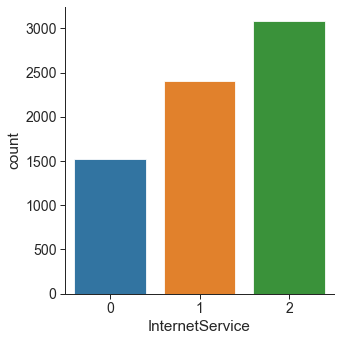

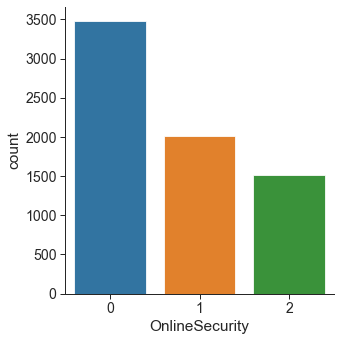

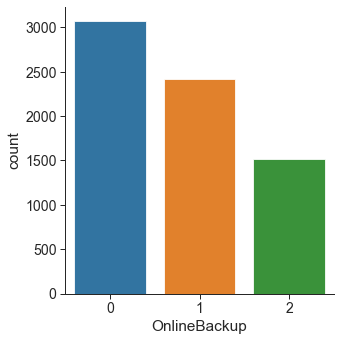

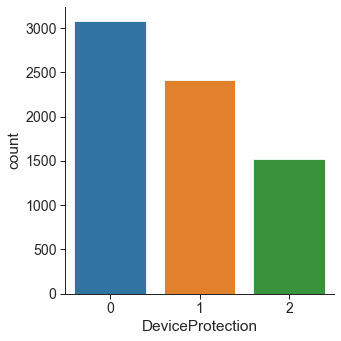

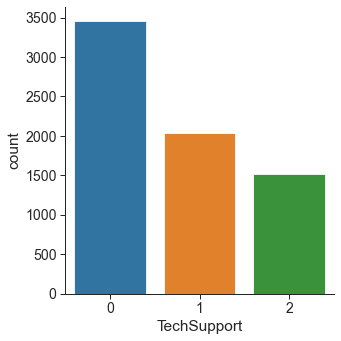

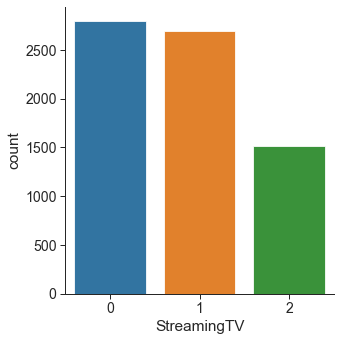

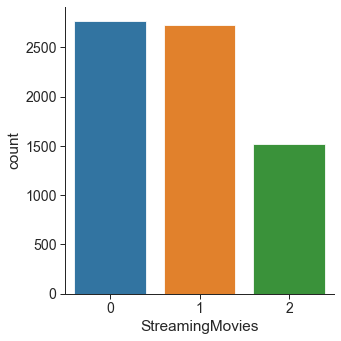

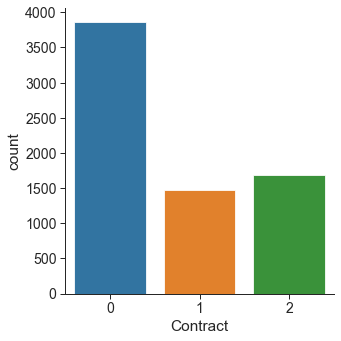

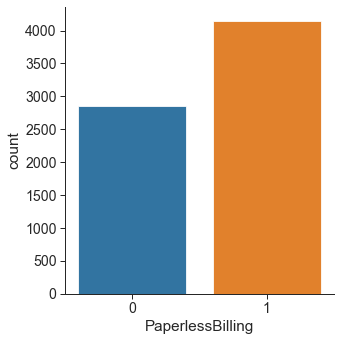

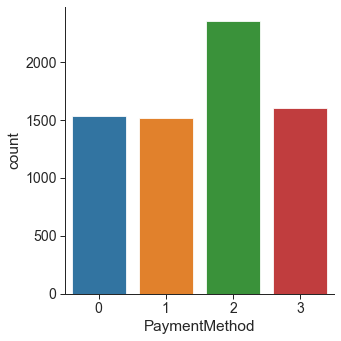

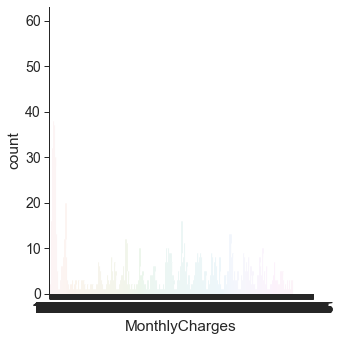

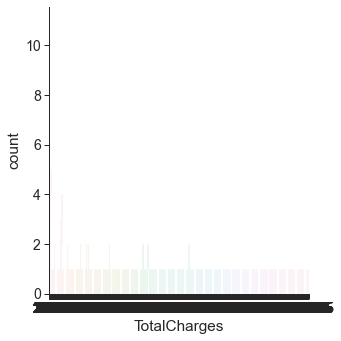

In [10]:
for column in churn_data.columns[1:np.size(churn_data.columns)-1]:
    sb.catplot(x=column, data=churn_data, kind="count")